In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('/content/insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df['police_report_available'].replace('?',np.nan,inplace=True)

In [5]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [7]:
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.select_dtypes(include='object').columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [9]:
df['policy_bind_date']=df['policy_bind_date'].apply(lambda x:pd.to_datetime(x))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [11]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [12]:
df['policy_state']=df['policy_state'].map({'OH':0,'IN':1,'IL':2})

In [13]:
df['policy_state'].unique()

array([0, 1, 2])

In [14]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [15]:
df['policy_csl']=df['policy_csl'].map({'250/500':0,'100/300':1,'500/1000':2})

In [16]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [17]:
df['insured_sex']=df['insured_sex'].map({'MALE':0,'FEMALE':1})

In [18]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [19]:
df['insured_education_level']=df['insured_education_level'].map({'MD':0,'PhD':1,'Associate':2,
                                                                 'Masters':3,'High School':4,
                                                                 'College':5,'JD':6})

In [20]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [21]:
le=LabelEncoder()
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])

In [22]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [23]:
df['insured_relationship']=df['insured_relationship'].map({'husband':0, 'other-relative':1,
                                                           'own-child':2, 'unmarried':3,
                                                           'wife':4,'not-in-family':5})

In [24]:
df['incident_date']=df['incident_date'].apply(lambda x:pd.to_datetime(x))

In [25]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [26]:
df['incident_type']=df['incident_type'].map({'Single Vehicle Collision':0, 'Vehicle Theft':1,
                                             'Multi-vehicle Collision':2, 'Parked Car':3})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   int64         
 5   policy_csl                   1000 non-null   int64         
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   int64         
 11  insured_education_level      1000 non-null  

In [28]:
df['insured_occupation'].unique()
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

In [29]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [30]:
df['collision_type'].replace('?',np.nan,inplace=True)

In [31]:
df['collision_type']=df['collision_type'].map({'Side Collision':0, 'Rear Collision':1, 'Front Collision':2})

In [32]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [33]:
df['incident_severity']=df['incident_severity'].map({'Minor Damage':0, 'Major Damage':1, 'Total Loss':2, 'Trivial Damage':3})

In [34]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [35]:
df['authorities_contacted']=df['authorities_contacted'].map({'Police':0, 'Fire':1, 'Other':2,'Ambulance':3})

In [36]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [37]:
df['incident_state']=df['incident_state'].map({'SC':0, 'VA':1, 'NY':2, 'OH':3, 'WV':4, 'NC':5, 'PA':6})

In [38]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [39]:
df['incident_city']=df['incident_city'].map({'Columbus':0, 'Riverwood':1, 'Arlington':2,
                                             'Springfield':3, 'Hillsdale':4,'Northbend':5, 'Northbrook':6})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   int64         
 5   policy_csl                   1000 non-null   int64         
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   int64         
 11  insured_education_level      1000 non-null  

In [41]:
len(df['incident_location'].unique())

1000

In [42]:
df['incident_location']=le.fit_transform(df['incident_location'])

In [43]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [44]:
df['property_damage']=df['property_damage'].map({'YES':1,'NO':0})

In [45]:
df['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [46]:
df['police_report_available']=df['police_report_available'].map({'YES':1,'NO':0})

In [47]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [48]:
df['auto_make']=df['auto_make'].map({'Saab':0, 'Mercedes':1, 'Dodge':2, 'Chevrolet':3,
                                     'Accura':4, 'Nissan':5, 'Audi':6, 'Toyota':7,
                                     'Ford':8, 'Suburu':9, 'BMW':10, 'Jeep':11, 'Honda':12,'Volkswagen':13})

In [49]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [50]:
df['auto_model']=le.fit_transform(df['auto_model'])

In [51]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [52]:
df['fraud_reported']=df['fraud_reported'].map({'Y':1,'N':0})

In [53]:
df.select_dtypes(include=[np.number]).skew()

,0
months_as_customer,0.362177
age,0.478988
policy_number,0.038991
policy_state,0.026177
policy_csl,0.092720
policy_deductable,0.477887
policy_annual_premium,0.004402
umbrella_limit,1.806712
insured_zip,0.816554
insured_sex,-0.148630


In [54]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    if abs(df[i].skew())<1:
      df[i].fillna(df[i].mean(),inplace=True)
    else:
      df[i].fillna(df[i].median(),inplace=True)

In [55]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


<Axes: >

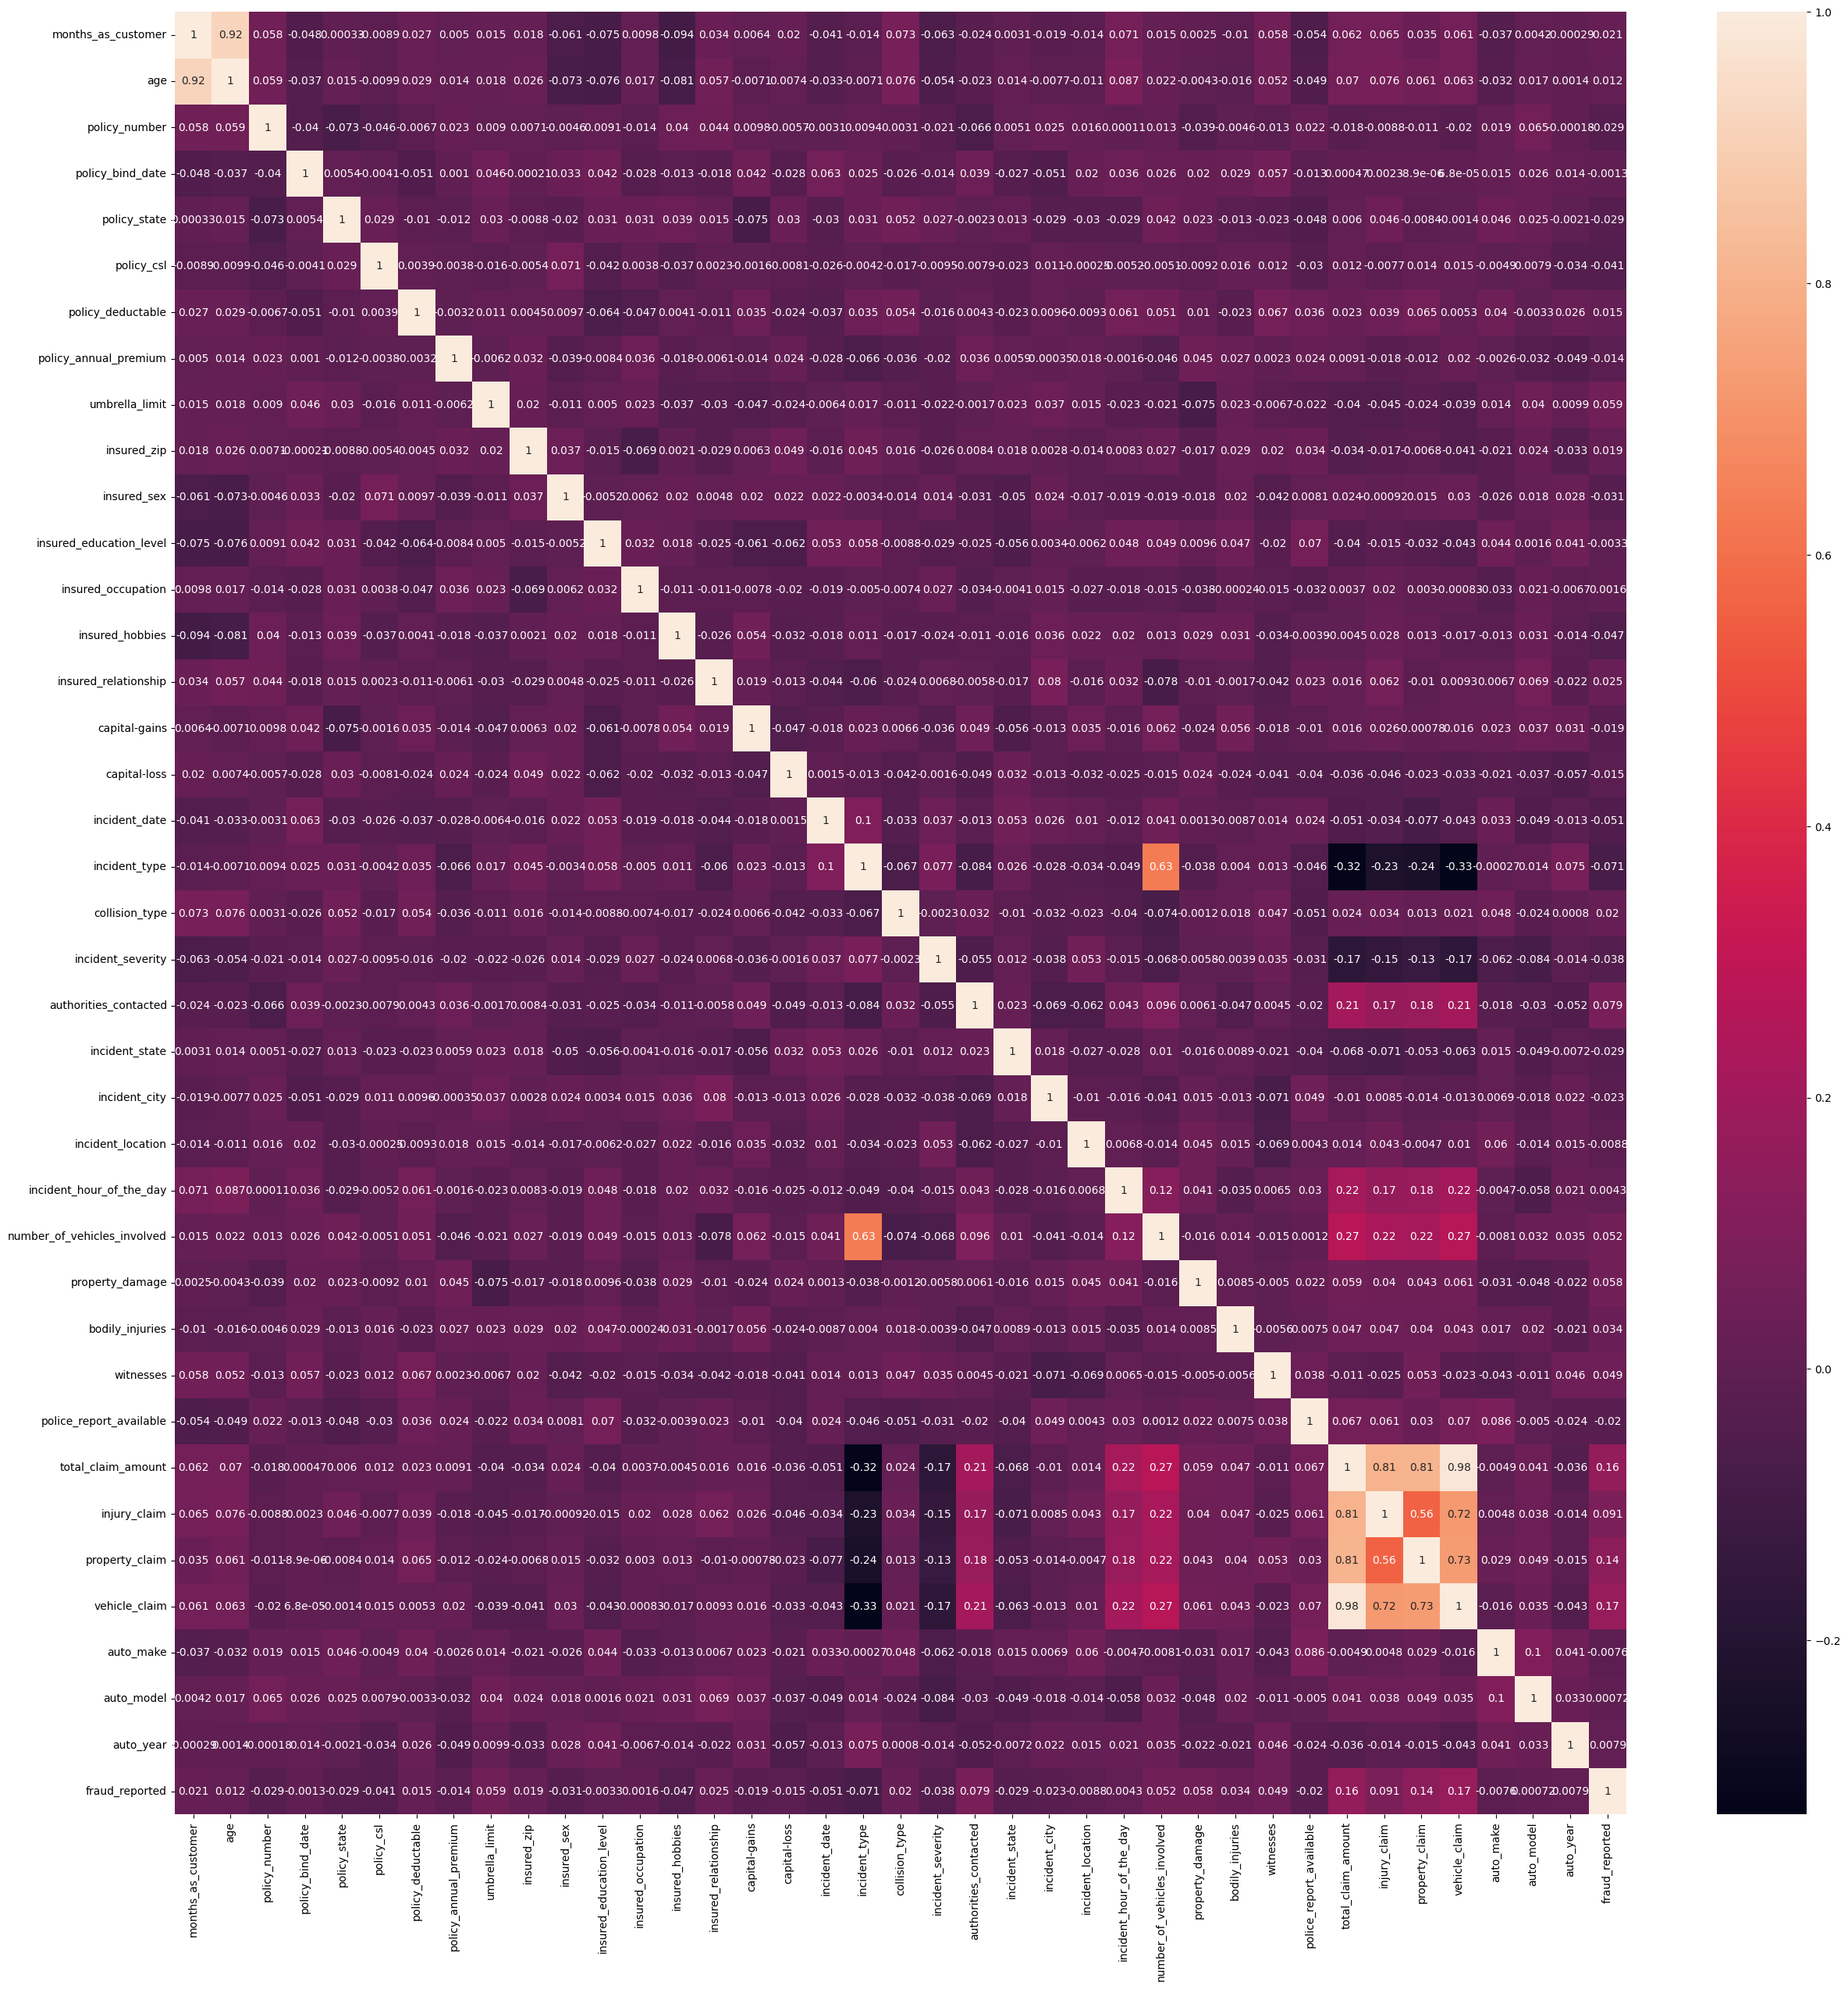

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Model Training

In [57]:
x = df.drop('fraud_reported', axis=1)
x = x.select_dtypes(exclude=['datetime'])
y = df['fraud_reported']


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [86]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# SGDClassifier(L2 Penalty)

In [87]:
sgd=SGDClassifier(loss='hinge', penalty='l2',max_iter=1000)
sgd.fit(x_train,y_train)

SGDClassifier()

In [88]:
y_pred=sgd.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.7214285714285714
[[477  56]
 [139  28]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       533
           1       0.33      0.17      0.22       167

    accuracy                           0.72       700
   macro avg       0.55      0.53      0.53       700
weighted avg       0.67      0.72      0.69       700



In [89]:
y_predict=sgd.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.6766666666666666
[[187  33]
 [ 64  16]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       220
           1       0.33      0.20      0.25        80

    accuracy                           0.68       300
   macro avg       0.54      0.53      0.52       300
weighted avg       0.63      0.68      0.65       300



# SGDClassifier(L1 Penalty)

In [90]:
sgd=SGDClassifier(loss='hinge', penalty='l1',max_iter=1000)
sgd.fit(x_train,y_train)

SGDClassifier(penalty='l1')

In [91]:
y_pred=sgd.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.7042857142857143
[[464  69]
 [138  29]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       533
           1       0.30      0.17      0.22       167

    accuracy                           0.70       700
   macro avg       0.53      0.52      0.52       700
weighted avg       0.66      0.70      0.67       700



In [92]:
y_predict=sgd.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.68
[[191  29]
 [ 67  13]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       220
           1       0.31      0.16      0.21        80

    accuracy                           0.68       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.63      0.68      0.64       300



# SGDClassifier(ElasticNet Penalty)

In [93]:
sgd=SGDClassifier(loss='hinge', penalty='elasticnet',max_iter=1000)
sgd.fit(x_train,y_train)

SGDClassifier(penalty='elasticnet')

In [94]:
y_pred=sgd.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.7357142857142858
[[489  44]
 [141  26]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       533
           1       0.37      0.16      0.22       167

    accuracy                           0.74       700
   macro avg       0.57      0.54      0.53       700
weighted avg       0.68      0.74      0.69       700



In [95]:
y_predict=sgd.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.72
[[209  11]
 [ 73   7]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       220
           1       0.39      0.09      0.14        80

    accuracy                           0.72       300
   macro avg       0.57      0.52      0.49       300
weighted avg       0.65      0.72      0.65       300



# SVC(Linear Kernel)

In [96]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [97]:
y_pred=svc.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.7614285714285715
[[533   0]
 [167   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       533
           1       0.00      0.00      0.00       167

    accuracy                           0.76       700
   macro avg       0.38      0.50      0.43       700
weighted avg       0.58      0.76      0.66       700



In [98]:
y_predict=svc.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.7333333333333333
[[220   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



# SVC(RBF Kernel)

In [99]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [100]:
y_pred=svc.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.7785714285714286
[[533   0]
 [155  12]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       533
           1       1.00      0.07      0.13       167

    accuracy                           0.78       700
   macro avg       0.89      0.54      0.50       700
weighted avg       0.83      0.78      0.70       700



In [101]:
y_predict=svc.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.7333333333333333
[[220   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



# SVC(Polynomial Kernel)

In [102]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [103]:
y_pred=svc.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.88
[[533   0]
 [ 84  83]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       533
           1       1.00      0.50      0.66       167

    accuracy                           0.88       700
   macro avg       0.93      0.75      0.80       700
weighted avg       0.90      0.88      0.86       700



In [104]:
y_predict=svc.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.7266666666666667
[[218   2]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



# SVC(Sigmoid Kernel)

In [105]:
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [106]:
y_pred=svc.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.7614285714285715
[[533   0]
 [167   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       533
           1       0.00      0.00      0.00       167

    accuracy                           0.76       700
   macro avg       0.38      0.50      0.43       700
weighted avg       0.58      0.76      0.66       700



In [107]:
y_predict=svc.predict(x_test)
score=accuracy_score(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print(score)
print(cm)
print(classification_report(y_test,y_predict))

0.7333333333333333
[[220   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300

